# Covid 19 Statistics using PANDASQL

Pandasql is a package that allows you to use SQL syntax in Python. Pandasql uses SQLITE syntax, so to get some practice with it and some python packages, I am going to use it to recreate some of the graphs used on worldometers.info

First, we're going to import pandas and from pandasql, sqldf, which is the function that will be used to run querries against the dataset. The dataset was downloaded from https://github.com/owid/covid-19-data/tree/master/public/data and contains up to date information on covid statistics.

In [1]:
import pandas as pd
from pandasql import sqldf

In [2]:
covid = pd.read_csv('owid-covid-data.csv')
covid.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Each row represents a single date for a single country and there are a large number of values being collected - many of them are null

In [3]:
(covid.isna().sum()/covid.count()).sort_values()

iso_code                                    0.000000
population                                  0.000000
location                                    0.000000
date                                        0.000000
new_deaths_per_million                      0.028749
                                             ...    
excess_mortality_cumulative_absolute       28.176877
excess_mortality_cumulative                28.176877
excess_mortality_cumulative_per_million    28.176877
weekly_icu_admissions_per_million          31.891387
weekly_icu_admissions                      31.891387
Length: 67, dtype: float64

To run SQL queries we use teh sqldf() function, which takes two arguments - the query and an optional second argument that stipulates whether to use global() or local() functions - I'll just be using global() here.

In [4]:
sql_df = lambda query: sqldf(query, globals())
covid = covid[['continent', 'location', 'date', 'new_cases', 'new_deaths', 'population']]

In [5]:
covid.head()

,continent,location,date,new_cases,new_deaths,population
0,Asia,Afghanistan,2020-01-03,0.0,0.0,41128772.0
1,Asia,Afghanistan,2020-01-04,0.0,0.0,41128772.0
2,Asia,Afghanistan,2020-01-05,0.0,0.0,41128772.0
3,Asia,Afghanistan,2020-01-06,0.0,0.0,41128772.0
4,Asia,Afghanistan,2020-01-07,0.0,0.0,41128772.0


It looks like the number of days that data was collected from each country is not uniform, but the majority are relalively similar from around 11 to 12 hundred.

In [6]:
sql_df("""

SELECT DISTINCT location, 
    COUNT(location) OVER(PARTITION BY location) AS recorded_days,
    MIN(date) OVER(PARTITION BY location) AS first_recorded_date,
    MAX(date) OVER(PARTITION BY location) AS last_recorded_date
FROM covid
ORDER BY recorded_days DESC

""")

,location,recorded_days,first_recorded_date,last_recorded_date
0,Argentina,1205,2020-01-01,2023-04-19
1,Austria,1205,2020-01-03,2023-04-21
2,Chile,1205,2020-01-03,2023-04-21
3,Denmark,1205,2020-01-03,2023-04-21
4,Germany,1205,2020-01-03,2023-04-21
...,...,...,...,...
250,England,1126,2020-03-20,2023-04-19
251,Wales,1114,2020-04-01,2023-04-19
252,Macao,795,2021-02-08,2023-04-13
253,Northern Cyprus,691,2021-01-14,2022-12-06


We can query some of the data on new cases and plot it using matplotlib

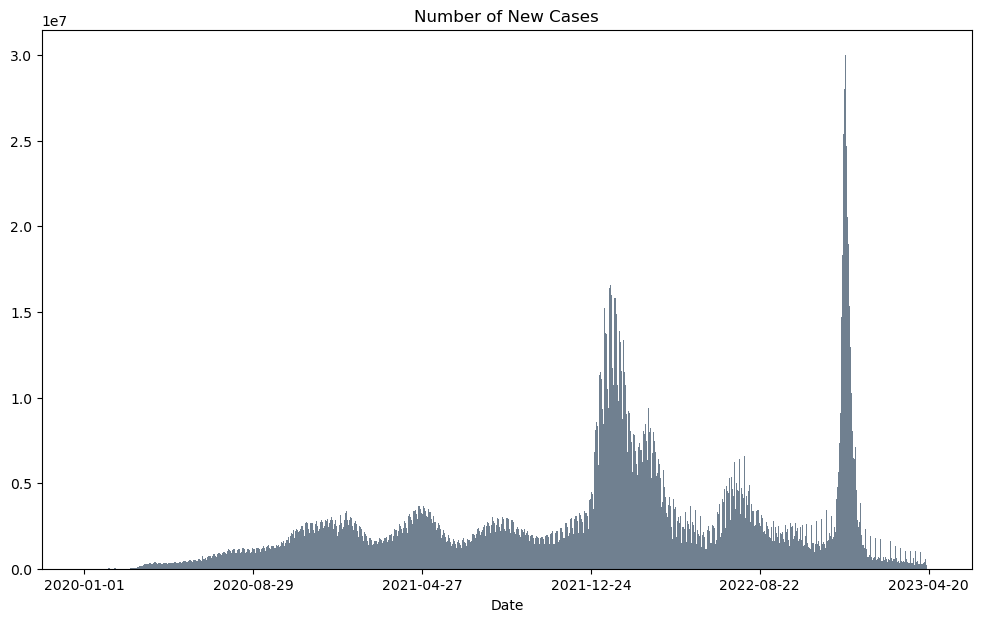

In [7]:
import numpy as np
from matplotlib import pyplot as plt

daily_cases = sql_df("""

SELECT date, 
    SUM(COALESCE(new_cases, 0)) AS new_cases
FROM covid
GROUP BY date
ORDER BY date

""")

plt.rcParams['figure.figsize'] = [12, 7]

x_pos = np.arange(len(daily_cases['date']))   
plt.bar(x_pos, daily_cases['new_cases'], color = 'slategray', width=1.0)

plt.xlabel('Date'); 
plt.title('Number of New Cases') # label the title and y-axis
plt.xticks(x_pos[::len(x_pos)//5], daily_cases.date[::len(x_pos)//5]);

Next, we can query the moving averages using sliding window functions in the SQL query to overlay these on top of the histogram.

In [8]:
daily_cases_rt = sql_df("""
    
    WITH daily_cases AS(
        SELECT date, 
            SUM(COALESCE(new_cases, 0)) AS new_cases
        FROM covid
        GROUP BY date)
    SELECT date, new_cases,
        SUM(COALESCE(new_cases, 0))OVER(ORDER BY date
            ROWS BETWEEN
            2 PRECEDING AND CURRENT ROW)/3 AS ma_3,
        SUM(COALESCE(new_cases, 0))OVER(ORDER BY date
            ROWS BETWEEN
            6 PRECEDING AND CURRENT ROW)/7 AS ma_7
    FROM daily_cases
    ORDER BY date

""")

In [9]:
# We can make the date look a bit nicer

xlabs = pd.to_datetime(daily_cases_rt.date[::len(x_pos)//5]).dt.strftime('%b %d,%Y')

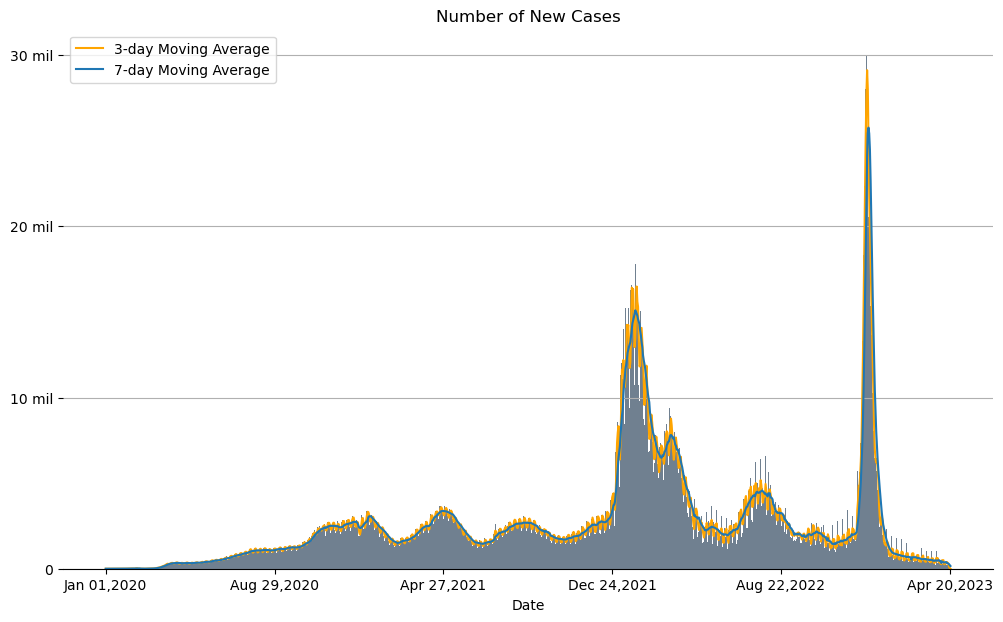

In [10]:
plt.rcParams['axes.spines.left'] = False # clean up the axes a bit
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False



plt.grid(axis = 'y') # Add gridlines
plt.bar(x_pos, daily_cases_rt['new_cases'], color = 'slategray', width=1)
plt.xlabel('Date'); 
plt.title('Number of New Cases') # label the title and y-axis
plt.xticks(x_pos[::len(x_pos)//5], xlabs)
plt.yticks(np.arange(0, 30000001, 10000000), ['0', '10 mil', '20 mil', '30 mil'])

# 3 day moving average
x3 = np.arange(len(daily_cases['date']))
y3 = daily_cases_rt.ma_3
plt.plot(x3, y3, '-', label='3-day Moving Average',  color = 'orange')

# 7 day moving average
x7 = np.arange(len(daily_cases['date']))
y7 = daily_cases_rt.ma_7
plt.plot(x7, y7, '-', label='7-day Moving Average', color = 'tab:blue')

plt.legend();